# Week 5-6: Image Quantization

<font size="6"> Laboratory 3 </font> <br>
<font size="3"> Last updated April 18, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- probability mass function
- cumulative distribution function
     
<font size="5"> Programming Skills </font>
- funtions
- loops
- multi-dimensional arrays
    
<font size="5"> Embedded Systems </font>
- Thonny and MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>

- Raspberry Pi Pico
- Breadboard
- USB connector
- Camera (Arducam HM01B0)


<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** me 

**Email:** me @purdue.edu

## <span style="color:orange;"> 1. Quantization  </span>

In [The Data Science Labs on Mulitvariable Calculus](https://thedatasciencelabs.github.io/DataLab_Multivariate_Calculus/intro.html), we briefly introduce uniform quantization methods. Quantization of images refers to the process of reducing the information of an image from a wider range of values to a smaller range. Quantization is used for image compression to reduce storage space on devices, for creating image filters, and for processes like printing. As we saw in the previous lab on texture identification, grayscale images contain values between 0 and 255, but what if we could only use 5 values or 10 values? We'd need some sort of map or function that tells us how to change our range 0-255 to the 5 new discrete levels.

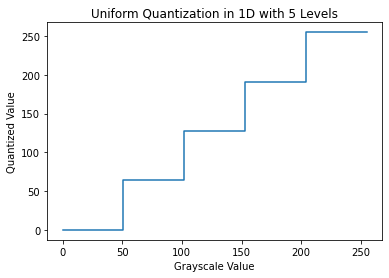

In [1]:
import numpy as np
import matplotlib.pyplot as plt    

num_levels=5
x = np.linspace(0,255,num_levels+1)
y = np.linspace(0,255,num_levels)
  
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title('Uniform Quantization in 1D with 5 Levels')
plt.show()

We can interpret the graph like this. Given a image $I$ that is $m\times n$, at each pixel location $(i,j)$ we know the grayscale value, i.e., some whole number between 0 and 255. Then we change the grayscale value at $(i,j)$ to a new value based on the graph. For example, with 5 quantization levels if the grayscale value is originally 40, we will change it to 0.

### <span style="color:red"> Exercise </span>

Write a function that takes in a grayscale image as a NumPy array and returns a uniformly quantized image with $k$ levels. Show your results on [low_contrast.jpg](**add link**) when $k=2,5,10,25$.

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

image size is (1096, 1680)


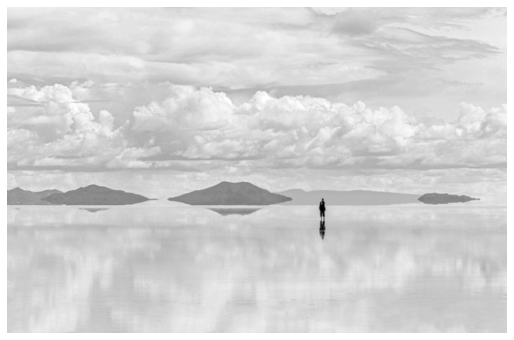

"\nquantized_img = uniform_quantization(img, 2)            # uniform quantization with k = 2\nfig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size\nax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255\nax.axis('off')                                          \nplt.show()\n\nquantized_img = uniform_quantization(img, 5)            # uniform quantization with k = 5\nfig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size\nax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255\nax.axis('off')                                          \nplt.show()\n\nquantized_img = uniform_quantization(img, 10)           # uniform quantization with k = 10\nfig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size\nax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)          

In [6]:
from PIL import Image                                   # needed for reading images

img = np.array(Image.open('images/low_contrast.jpg'))          # read in the image and store it as a numpy array
print(f'image size is {img.shape}')
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

# COMPLETE YOUR FUNCTION HERE
def uniform_quantization(img, k):
    return

# these are the test cases
'''
quantized_img = uniform_quantization(img, 2)            # uniform quantization with k = 2
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 5)            # uniform quantization with k = 5
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 10)           # uniform quantization with k = 10
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()

quantized_img = uniform_quantization(img, 25)           # uniform quantization with k = 25
fig, ax = plt.subplots(figsize=(12,6))                  # create figure and set figure size
ax.imshow(quantized_img, cmap='gray', vmin=0,vmax=255)            # display the image in grayscale between 0 and 255
ax.axis('off')                                          
plt.show()
'''

### <span style="color:red"> Exercise </span>

Write a function that quantizes an image according to the power function shown below with $k$ levels and power $p$. This is an example of non-uniform quantization.

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

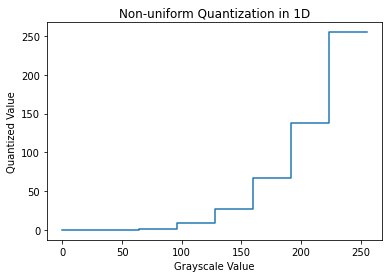

In [7]:
num_levels = 8
power = 4.0 
x = np.linspace(0,255,num_levels+1)
y = np.power( np.linspace(0, 255**(1/power), num=num_levels), power) 
  
plt.step(x, np.append(y,y[-1]), where='post')
plt.xlabel('Grayscale Value')
plt.ylabel('Quantized Value')
plt.title('Non-uniform Quantization in 1D')
plt.show()

## <span style="color:orange;"> 2. Histogram Equalization  </span>

Histogram equalization is a type of adaptive image processing method, which means the transformation is dependent on the image itself. Histogram equalization is used in medical imaging applications and other scientific imaging in fields like astronomy and microbiology. The uniform quantization method from the previous exercise is non-adaptive since we would apply the same quantization function no matter what image we are given. 

Let's say image $I$ is $m \times n$. Suppose the probability that a pixel value is at level $\ell$ is the frequency of $\ell$ in the image.
That means the **probability mass function** (pmf) corresponding to image $I$ is
$$ p_I(\ell) = \frac{\text{\# of times $\ell$ appears in $I$}}{m\cdot n}\quad \text{ for } \ell = 0,1,2,\dots,255. $$
The **cumulative distribution function** (cdf) of $I$ is 
$$ F_I(\ell) = P(I \leq \ell) = \sum_{j=0}^\ell p_I(j) \quad \text{ for } \ell = 0,1,2,\dots,255.$$

### <span style="color:red"> Exercise </span>

Plot the probability mass function and the cumulative distribution function of `low_contrast.jpg`.

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

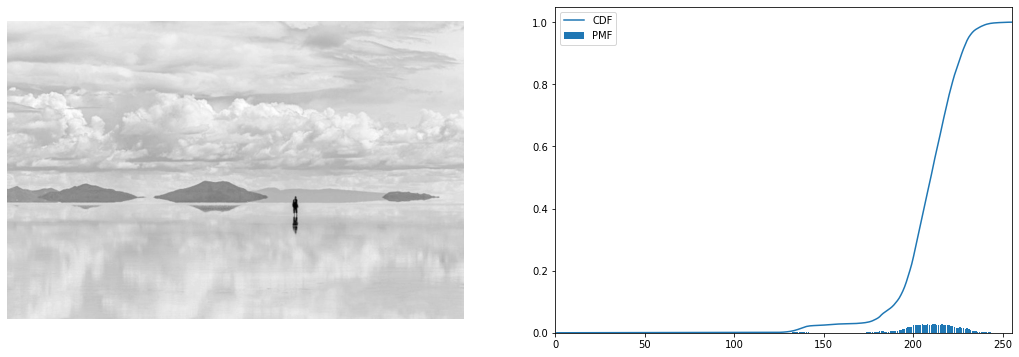

In [19]:
# remove solution                           
img = np.array(Image.open('images/low_contrast.jpg'))  
fig, ax = plt.subplots(1,2, figsize=(18,6))               
ax[0].imshow(img, cmap='gray', vmin=0,vmax=255)            
ax[0].axis('off')                                       

count, bins = np.histogram(img.flatten(), 256)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax[1].bar(bins[1:], pdf, label="PMF")
ax[1].plot(bins[1:], cdf, label="CDF")
ax[1].set_xlim([0,255])
ax[1].legend()
plt.show()

### <span style="color:red"> Exercise </span>

Plot the pmf and cdf of `low_contrast.jpg` after uniform quantization with $25$ levels. Describe how the quantization process changed these two functions. 

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

Now, we will derive the method of histogram equalization.

Starting with an image $I$ of size $m\times n$, we want to define a map that changes the original pixel intensities to a new values. 
Let's call the transformed image $I_{new}$.

The goal of histogram equlization is to **evenly distribute** pixel **intesities** across the whole range of values $0$ to $255$. This means $I_{new}$ will have the same number of pixels at each intensity. The pmf of $I_{new}$ would then be flat.

### <span style="color:red"> Exercise </span>

If the pmf of $I_{new}$ will be flat, what will the cdf of $I_{new}$ look like? Why?

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

Denote the pmf of $I_{new}$ by $$H(\ell) = P(I_{new} \leq \ell)\quad \text{ for } \ell = 0,1,2,\dots,255.$$

If $I_{new}$ has the same number of pixels at each intensity, then there are $\frac{m\cdot n }{255}$ pixels with value $\ell$ for $\ell = 0,1,2,\dots,255$.

### <span style="color:red"> Exercise </span>

Explain why
$$ H(\ell) = \frac{(\ell + 1) \cdot m\cdot n}{255} \quad \text{ for } \ell = 0,1,2,\dots,255.$$

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

Now, in image $I$, the grayscale value 0 will change to some new value between $0$ and $255$.
Since we haven't defined the exact transformation map, let's call that new level $n_0$.
In the same way, we will change pixel in $I$ with the grayscale value 1 to some new value $n_1$.
Pixels with value 2 in $I$ will change to the value $n_2$ and so on until we reach $n_{255}$.

In other words, in our transformed image $I_{new}$, we map the intensity levels $0,1,2,\dots,255$ in the original image $I$ to some new levels $n_0,n_1,n_2,\dots,n_{255}$.

We want the number of pixels with intensity between $0$ and $\ell$ in image $I$ to be the same as number of pixels with intensity between $0$ and $n_\ell$ in image $I_{new}$.

By definition, $F_I(\ell)$ is the number pixels in $I$ with intensity between $0$ and $\ell$.

Similarly,  $H(n_\ell)$ is the number pixels in $I_{new}$ with intensity between $0$ and $n_\ell$.

To figure what levels $n_0,n_1,n_2,\dots,n_{255}$ are ideal to even out the grayscale intensity in the image $I$, we want to set
$$ F_I(\ell)  = H(n_\ell)\quad \text{ for } \ell = 0,1,2,\dots,255.$$


### <span style="color:red"> Exercise </span>

In the last line, evaluate the function $H$ at $n_\ell$ and solve for $n_\ell$. Format your answer using $\LaTeX$.

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

---
**NOTE**

This is a 2-week lab. Turn in the exercises above. Pick up from here during the next lab session.

--- 

### <span style="color:red"> Exercise </span>

Now that we know the values for $n_0,n_1,n_2,\dots,n_{255}$, we are ready to implement the histogram equalization process.

Implement histogram equalization on `low_contrast.jpg`. 
Plot the transformed image $I_{new}$ along with the pmf and cdf of $I_{new}$. 

*Hint: If the new levels $n_0,n_1,\dots,n_{255}$ are not integers (which is likely), then use `np.floor` function to round down.*

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

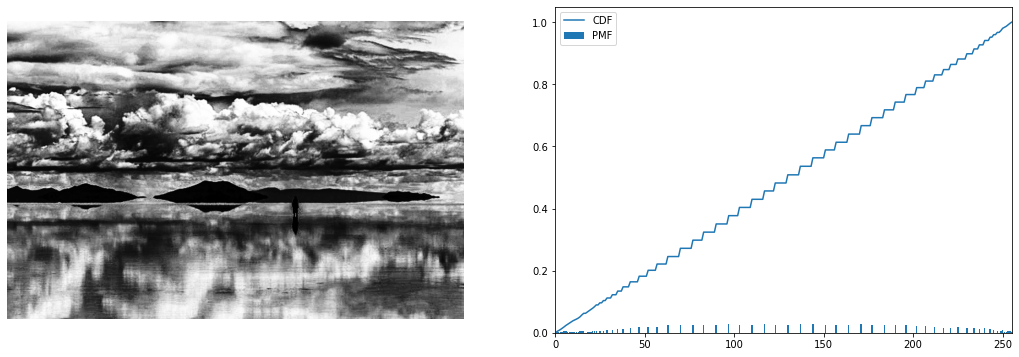

In [20]:
# remove solution
transform_map = np.floor(255*cdf).astype(np.uint8)
img_list = list(img.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img.shape)
img2 = eq_img_array

fig, ax = plt.subplots(1,2, figsize=(18,6))               
ax[0].imshow(img2, cmap='gray', vmin=0,vmax=255)            
ax[0].axis('off')                                       

count, bins = np.histogram(img2.flatten(), 255)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
ax[1].bar(bins[1:], pdf, label="PMF")
ax[1].plot(bins[1:], cdf, label="CDF")
ax[1].set_xlim([0,255])
ax[1].legend()
plt.show()

**TODO: add in [camera wiring instructions](https://thedatasciencelabs.github.io/DataLab_Multivariate_Calculus/labs/2_Video_Labs/lab07.html) and code to take a picture**

### <span style="color:red"> Exercise </span>

Repeat the previous exercise on your own captured image using the Arducam HM01B0 connected to a Pico.

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

### <span style="color:red"> Exercise </span>

Can you think of any images that would not "improve" very much after applying histogram equalization?

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

### <span style="color:red"> Exercise </span>

What happens if we first quantize the image (either uniformly or non-uniformly) with $k$ levels and then apply the histogram equalization process?

What about the reverse - doing histogram equaization and then uniform or non-uniform quantization?

How will increasing or decreasing the number of quantization levels $k$ change the new pmf and cdf? In a paragraph or two, summarize your findings. 

<h3 style="background-color:lightblue"> Write Answer for Exercise Below </h3>

## <span style="color:green;"> Reflection </span>

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>